In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import log_loss, accuracy_score

In [23]:
df = pd.read_excel("/home/learner/Desktop/Love/HCMST_2009_Data_ver_3.04.xlsx", )

/home/learner/Desktop/Love/venv/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [21]:
df.head()

,weight1,weight2,ppage,ppeduc,ppgender,pphhhead,pphouseholdsize,pphouse,ppincimp,ppmarit,...,pp2_ppt1317,pp2_ppt18ov,pp2_ppt25,pp2_ppt612,pp2_ppwork,pp2_ppnet,pp2_ppcmdate_yrmo,w2_HCMST_interview_fin_yrmo,w2_q10,w2_broke_up
1,4265,4265,52,12,2,1,2,3,7,6,...,0,2,0,0,4,1,200905,201003,0,0
2,16485,16485,28,13,2,1,2,3,11,6,...,0,2,0,0,1,1,200904,201003,0,0
3,52464,0,49,9,2,1,4,3,10,5,...,1,3,0,0,1,1,200904,0,0,0
4,4575,4575,31,11,1,1,1,3,11,5,...,0,1,0,0,1,1,200905,201003,1,1
5,12147,0,35,9,1,1,2,2,11,5,...,0,2,0,0,2,1,200904,0,0,0


In [25]:

columns_to_keep = [
    'caseid_new', 'weight1', 'weight2', 'ppage', 'ppeduc', 'ppgender', 'pphhhead', 
    'pphouseholdsize', 'pphouse', 'ppincimp', 'ppmarit', 'ppmsacat', 'pprent', 
    'ppt18ov', 'children_in_hh', 'ppwork', 'pphispan', 'pprace_white', 'pprace_black', 
    'pprace_nativeamerican', 'pprace_asianindian', 'pprace_chinese', 'pprace_filipino', 
    'pprace_japanese', 'pprace_korean', 'pprace_vietnamese', 'pprace_otherasian', 
    'pprace_hawaiian', 'pprace_guamanian', 'pprace_samoan', 'pprace_otherpacificislander', 
    'pprace_someotherrace', 'pppartyid3', 'papreligion', 'ppppcmdate_yrmo', 'pppadate_yrmo', 
    'HCMST_main_interview_yrmo', 'qflag', 'glbstatus', 's1', 's1a', 's2', 'q4', 'q5', 
    'q6a', 'q6b', 'q7b', 'q9', 'q10', 'q15a1_compressed', 'q16', 'q17b', 'q19', 'q20', 'q21a',
    'q21b', 'q21c', 'q21d', 'q22', 'q23', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30', 
    'q31_1', 'q31_2', 'q31_3', 'q31_4', 'q31_5', 'q31_6', 'q31_7', 'q31_8', 'q31_9', 
    'q31_other_text_entered', 'q32', 'q33_1', 'q33_2', 'q33_3', 'q33_4', 'q33_5', 'q33_6', 
    'q33_7', 'q33_other_text_entered', 'q34', 'q24_met_online', 'q24_btwn_I_cowork', 
    'q24_btwn_I_friend', 'q24_btwn_I_family', 'q24_btwn_I_sig_other', 'q24_btwn_I_neighbor', 
    'q24_school', 'q24_college', 'q24_military', 'q24_church', 'q24_vol_org', 'q24_customer', 
    'q24_bar_restaurant', 'q24_internet_dating', 'q24_internet_social_networking', 
    'q24_internet_game', 'q24_internet_chat', 'q24_internet_community', 'q24_internet_other', 
    'q24_public', 'q24_private_party', 'q24_blind_date', 'q24_vacation', 
    'q24_singles_service_non_internet', 'q24_business_trip', 'q24_work_neighbor', 
    'age_difference', 'met_through_friends', 'met_through_family', 'met_through_as_neighbors', 
    'met_through_as_coworkers', 'parental_approval', 'relationship_quality', 'coresident', 
    'pp2_afterp1', 'pp2_pphhhead', 'pp2_pphhsize', 'pp2_pphouse', 'pp2_ppincimp', 'pp2_ppmarit', 
    'pp2_ppmsacat', 'pp2_ppeduc', 'pp2_ppeducat', 'pp2_respondent_yrsed', 'pp2_ppethm', 
    'pp2_ppreg4', 'pp2_ppreg9', 'pp2_pprent', 'pp2_ppt01', 'pp2_ppt1317', 'pp2_ppt18ov', 
    'pp2_ppt25', 'pp2_ppt612', 'pp2_ppwork', 'pp2_ppnet', 'pp2_ppcmdate_yrmo', 
    'w2_HCMST_interview_fin_yrmo', 'w2_q10', 'w2_broke_up'
]

df = df[columns_to_keep]
df.shape

(4002, 145)

In [24]:
df = df.drop(index = 0).drop(columns = df.columns[0])
df.head()

,caseid_new,weight1,weight2,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,...,w3_mbtiming_year,w3_mbtiming_month,w3_q5,w3_q6,w3_q7,w3_q8,w3_q9,w3_q10,w3_nonmbtiming_year,w3_nonmbtiming_month
1,22526,4265,4265,52,4,3,12,4,4,2,...,0,0,1,1,2,1,0,0,0,0
2,23286,16485,16485,28,2,1,13,4,1,2,...,0,0,0,0,0,0,0,0,0,0
3,25495,52464,0,49,4,3,9,2,2,2,...,0,0,0,0,0,0,0,0,0,0
4,26315,4575,4575,31,2,2,11,3,1,1,...,0,0,0,0,0,0,0,0,0,0
5,27355,12147,0,35,3,2,9,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
categorical_columns = [
    'ppeduc', 'pphhhead', 'pphouse', 'ppincimp', 'ppmarit', 
    'ppmsacat', 'pprent', 'ppgender', 'ppwork', 'pppartyid3', 
    'papreligion', 'glbstatus', 'qflag', 'pphispan', 'pprace_white', 'pprace_black', 
    'pprace_chinese', 'pprace_filipino', 'pprace_japanese', 'pprace_korean',
    'pprace_vietnamese', 'pprace_otherasian', 's1a','pp2_respondent_yrsed',
    'pprace_nativeamerican', 'pprace_asianindian', 'pprace_hawaiian', 
    'pprace_guamanian', 'pprace_samoan', 'pprace_otherpacificislander', 
    'pprace_someotherrace', 's1', 's2', 'q4', 'q5', 'q6a', 'q6b', 'q7b'
    ,'q10', 'q15a1_compressed', 'q17b', 'q19', 'q20', 
    'q22', 'q23', 'q25', 'q26', 'q27', 'q28', 
    'q29', 'q30', 'q31_1', 'q31_2', 'q31_3', 'q31_4', 'q31_5', 'q31_6', 'q31_7', 
    'q31_8', 'q31_9', 'q31_other_text_entered', 'q32', 'q33_1', 'q33_2', 'q33_3', 
    'q33_4', 'q33_5', 'q33_6', 'q33_7', 'q33_other_text_entered', 'q34', 'q24_met_online', 
    'q24_btwn_I_cowork', 'q24_btwn_I_friend', 'q24_btwn_I_family', 'q24_btwn_I_sig_other', 
    'q24_btwn_I_neighbor', 'q24_school', 'q24_college', 'q24_military', 'q24_church', 
    'q24_vol_org', 'q24_customer', 'q24_bar_restaurant', 'q24_internet_dating', 
    'q24_internet_social_networking', 'q24_internet_game', 'q24_internet_chat', 
    'q24_internet_community', 'q24_internet_other', 'q24_public', 'q24_private_party', 
    'q24_blind_date', 'q24_vacation', 'q24_singles_service_non_internet', 'q24_business_trip', 
    'q24_work_neighbor', 'met_through_friends', 'met_through_family', 'met_through_as_neighbors', 
    'met_through_as_coworkers', 'parental_approval', 'relationship_quality', 'coresident', 
    'pp2_afterp1', 'pp2_pphhhead', 'pp2_pphouse', 'pp2_ppincimp', 'pp2_ppmarit', 
    'pp2_ppmsacat', 'pp2_ppeduc', 'pp2_ppeducat', 'pp2_ppethm', 'pp2_ppreg4', 'pp2_ppreg9', 
    'pp2_pprent', 'pp2_ppt01', 'pp2_ppt1317', 'pp2_ppt25', 'pp2_ppt612', 
    'pp2_ppwork', 'pp2_ppnet', 'w2_q10', 'w2_broke_up'
]

numerical_columns = [
    'caseid_new', 'weight1', 'weight2', 'ppage', 'ppt18ov', 'pp2_ppt18ov',  
    'pphouseholdsize', 'children_in_hh', 'age_difference', 'pp2_pphhsize', 'q21a', 'q21b', 
    'q21c', 'q21d', 'q9', 'q16', 
]

date_columns = [
    'ppppcmdate_yrmo', 'pppadate_yrmo', 'HCMST_main_interview_yrmo', 'pp2_ppcmdate_yrmo', 
    'w2_HCMST_interview_fin_yrmo'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

for col in numerical_columns:
    df[col] = df[col].astype(int)

for col in date_columns:
    df[col] = pd.to_datetime(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002 entries, 1 to 4002
Columns: 145 entries, caseid_new to w2_broke_up
dtypes: category(124), datetime64[ns](5), int64(16)
memory usage: 1.1 MB


In [ ]:
# Replace 0's with the average for numerical columns
for col in numerical_columns:
    mean_value = df[col].replace(0, pd.NA).mean()  # Calculate mean excluding zeros
    df[col] = df[col].replace(0, mean_value)  # Replace zeros with the mean

## Replace NaN with "Unknown" for categorical columns
for col in categorical_columns:
    # Ensure "Unknown" is a valid category
    df[col] = df[col].cat.add_categories('Unknown')
    df[col] = df[col].fillna("Unknown")  # Replace NaN with "Unknown"

# Verify the changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002 entries, 1 to 4002
Columns: 145 entries, caseid_new to w2_broke_up
dtypes: category(124), datetime64[ns](5), float64(11), int64(5)
memory usage: 1.1 MB


# Data Cleaning and Transformation

In [27]:
pphhsize2_zero = df[df['pp2_pphhsize'] == 0]
pphhsize2_zero

,caseid_new,weight1,weight2,ppage,ppeduc,ppgender,pphhhead,pphouseholdsize,pphouse,ppincimp,...,pp2_ppt1317,pp2_ppt18ov,pp2_ppt25,pp2_ppt612,pp2_ppwork,pp2_ppnet,pp2_ppcmdate_yrmo,w2_HCMST_interview_fin_yrmo,w2_q10,w2_broke_up
11,32656,2189,2189,65,13,2,1,2,1,17,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000000000,0,0
33,55686,2170,2170,68,12,1,1,2,1,10,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000000000,0,0
86,108501,33960,33960,50,14,1,1,2,1,14,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000201004,0,0
129,153673,1624,0,67,12,2,1,1,3,4,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000000000,0,0
150,174603,62958,62958,60,12,2,1,1,2,10,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000201003,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3983,4607235,24695,24695,23,10,2,0,2,3,3,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000000000,0,0
3985,4609371,38169,38169,37,12,2,1,2,1,19,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000000000,0,0
3996,4621371,41156,41156,37,12,1,1,3,1,17,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000201003,0,0
4000,4626536,2121,2121,53,11,2,0,2,2,18,...,0,0,0,0,0,0,1970-01-01,1970-01-01 00:00:00.000000000,0,0


In [28]:
df.ppgender.value_counts()
# Makority of the respondents are women

ppgender
2    2035
1    1967
Name: count, dtype: int64

In [29]:
df.s1.value_counts()
# Still  married

s1
2    2071
1    1931
Name: count, dtype: int64

#Data Preprocessing

In [30]:

#Religion
religion_mapping = {
    1: "Baptist- any denomination",
    2: "Protestant",
    3: "Catholic",
    4: "Mormon",
    5: "Jewish",
    6: "Muslim",
    7: "Hindu",
    8: "Buddhist",
    9: "Pentecostal",
    10: "Eastern Orthodox",
    11: "Other Christian",
    12: "Other non-Christian",
    13: "None"
}

In [31]:
religion_counts = df['papreligion'].map(religion_mapping).value_counts()

# Compute percentages
religion_percentages = (religion_counts / religion_counts.sum() * 100).round(1)

# Create a DataFrame with counts and percentages
religion_distribution = pd.DataFrame({
    'Count': religion_counts,
    'Percentage': religion_percentages
})

religion_distribution.sort_values(by='Count')

,Count,Percentage
papreligion,,
Muslim,8,0.2
Hindu,13,0.3
Eastern Orthodox,15,0.4
Buddhist,33,0.8
Mormon,66,1.7
Jewish,110,2.8
Pentecostal,110,2.8
Other non-Christian,172,4.3
Other Christian,482,12.1


In [32]:
partner_religion_mapping = {
    1: "Baptist- any denomination",
    2: "Protestant",
    3: "Catholic",
    4: "Mormon",
    5: "Jewish",
    6: "Muslim",
    7: "Hindu",
    8: "Buddhist",
    9: "Pentecostal",
    10: "Eastern Orthodox",
    11: "Other Christian",
    12: "Other non-Christian",
    13: "None"
}
partner_religion_counts = df['q7b'].map(partner_religion_mapping).value_counts()

# Compute percentages
partner_religion_percentages = (partner_religion_counts / partner_religion_counts.sum() * 100).round(1)

# Create a DataFrame with counts and percentages
partner_religion_distribution = pd.DataFrame({
    'Count': partner_religion_counts,
    'Percentage': partner_religion_percentages
})

partner_religion_distribution.sort_values(by='Count')

,Count,Percentage
q7b,,
Hindu,8,0.3
Eastern Orthodox,11,0.4
Muslim,13,0.4
Buddhist,18,0.6
Other non-Christian,56,1.9
Mormon,65,2.2
Pentecostal,71,2.4
Jewish,83,2.8
Other Christian,372,12.4


In [33]:
relationship_quality_mapping = {
    1: "Excellent",
    2: "Good",
    3: "Fair",
    4: "Poor",
    5: "Very Poor"
}
papreligion_temp = df['papreligion'].astype(str)
q7b_temp = df['q7b'].astype(str)

# Filter for rows where respondent's religion matches the partner's religion for each unique 'caseid'
matching_religion = df[df['caseid_new'].isin(df[papreligion_temp == q7b_temp]['caseid_new'])]

matching_religion['relationship_quality'] = matching_religion['q34'].map(relationship_quality_mapping )

# Calculate the frequency of each relationship quality (q34_mapped) among those respondents
relationship_quality_counts = matching_religion['relationship_quality'].value_counts().sort_index()

# Convert counts to percentages
total_matching = relationship_quality_counts.sum()
relationship_quality_percentages = (relationship_quality_counts / total_matching * 100).round(1)

# Create a DataFrame with counts and percentages for relationship quality
relationship_quality_distribution = pd.DataFrame({
    'Relationship Quality': relationship_quality_counts.index,
    'Count': relationship_quality_counts.values,
    'Percentage': relationship_quality_percentages.values
})

# Display the resulting DataFrame
relationship_quality_distribution

/tmp/ipykernel_7713/2506132447.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_religion['relationship_quality'] = matching_religion['q34'].map(relationship_quality_mapping )


,Relationship Quality,Count,Percentage
0,Excellent,1011,63.3
1,Fair,106,6.6
2,Good,452,28.3
3,Poor,19,1.2
4,Very Poor,9,0.6


In [34]:
df.isnull().sum()

caseid_new                     0
weight1                        0
weight2                        0
ppage                          0
ppeduc                         0
                              ..
pp2_ppnet                      0
pp2_ppcmdate_yrmo              0
w2_HCMST_interview_fin_yrmo    0
w2_q10                         0
w2_broke_up                    0
Length: 145, dtype: int64

In [35]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define transformers
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_columns),   # Scale numerical features
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_columns) # Encode categorical
])

# Apply transformation
X = preprocessor.fit_transform(df)

In [36]:
df['relationship_duration'] = df['HCMST_main_interview_yrmo'] - df['ppppcmdate_yrmo']
df['time_since_meeting'] = df['HCMST_main_interview_yrmo'] - df['pppadate_yrmo']

# Drop original date columns
df = df.drop(columns=date_columns)

In [37]:
df.isnull().sum().sort_values(ascending=False)


caseid_new               0
weight1                  0
weight2                  0
ppage                    0
ppeduc                   0
                        ..
pp2_ppnet                0
w2_q10                   0
w2_broke_up              0
relationship_duration    0
time_since_meeting       0
Length: 142, dtype: int64

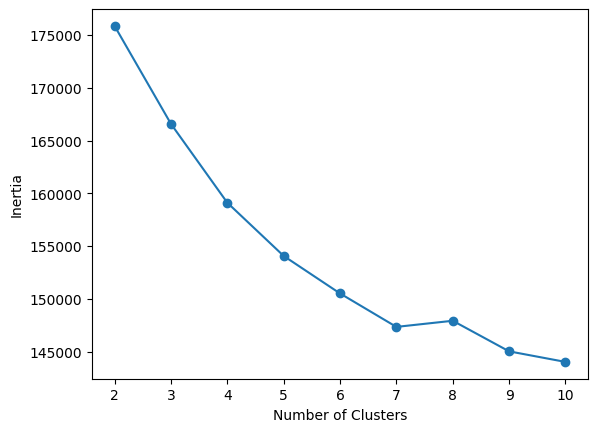

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4,random_state=42)
df['cluster'] = kmeans.fit_predict(X)


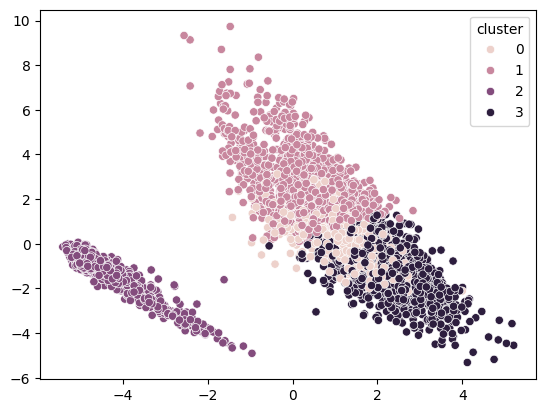

In [182]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'])
plt.show()

In [92]:
#Age

In [183]:
for column in ['q21b', 'q9', 'ppage',"q21a"]:
    mean_value = df[column].replace(0, pd.NA).mean()  # Calculate mean excluding zeros
    df[column] = df[column].replace(0, mean_value)  # Replace zeros with the mean


In [184]:
# Calculate mean and median for numerical variables
cluster_summary = df.groupby('cluster')["ppage"].agg(['mean', 'median'])
print(cluster_summary)



              mean  median
cluster                   
0        62.942771    62.0
1        52.508982    52.0
2        50.612286    53.0
3        33.855547    33.0


In [185]:
mode_summary = df.groupby('cluster')['papreligion'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(mode_summary)

''' 2: "Protestant",
    3: "Catholic"
    13: "None"'''


cluster
0    3
1    2
2    2
3    3
Name: papreligion, dtype: category
Categories (15, object): [0, 1, 2, 3, ..., 11, 12, 13, 'Unknown']


' 2: "Protestant",\n    3: "Catholic"\n    13: "None"'

In [ ]:
df['cluster'].value_counts()

cluster
3    1080
2     993
1     970
0     959
Name: count, dtype: int64

In [ ]:
# Calculate mean and median for numerical variables
cluster_summary = df.groupby('cluster')["q9"].agg(['mean', 'median'])
print(cluster_summary)
#Q9. How old is [Partner_Name]? 


              mean     median
cluster                      
0        63.467683  62.000000
1        49.903842  49.000000
2        46.117279  46.108325
3        34.687168  34.000000


In [ ]:
mode_summary = df.groupby('cluster')['q21b'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(mode_summary)
#Q21B. How old were you when your romantic relationship with [Partner_Name] began?

cluster
0    20.000000
1    40.000000
2    28.786457
3    18.000000
Name: q21b, dtype: float64


In [190]:
mode_summary = df.groupby('cluster')['age_difference'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
# Calculate mean and median for numerical variables
cluster_summary = df.groupby('cluster')["age_difference"].agg(['mean', 'median'])
print(cluster_summary)
print(mode_summary)

             mean    median
cluster                    
0        4.650812  4.000000
1        7.579620  6.000000
2        5.360171  5.350453
3        4.026021  3.000000
cluster
0    1.000000
1    1.000000
2    5.350453
3    1.000000
Name: age_difference, dtype: float64


In [133]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_columns])

# Number of clusters to test
n_clusters = 4

# K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Calculate silhouette score with all features
sil_score_all = silhouette_score(X_scaled, labels)

# Initialize an array to store silhouette scores excluding each feature
sil_scores = []

# Iterate through the feature indices and exclude one feature at a time
for i in range(X_scaled.shape[1]):
    X_excluded = np.delete(X_scaled, i, axis=1)  # Exclude the i-th feature
    sil_scores.append(silhouette_score(X_excluded, labels))

# Find which feature exclusion led to the greatest drop in silhouette score
feature_importance = np.array(sil_scores) - sil_score_all
important_features = np.argsort(feature_importance)

# Get the names of the most important features
important_feature_names = np.array(numerical_columns)[important_features]

# Display most influential features
print(f"Most influential features (ranked by importance): {important_feature_names}")


Most influential features (ranked by importance): ['q21a' 'q9' 'weight2' 'q21c' 'q21b' 'pp2_pphhsize' 'ppage'
 'pphouseholdsize' 'q21d' 'age_difference' 'pp2_ppt18ov' 'ppt18ov' 'q16'
 'children_in_hh' 'weight1' 'caseid_new']


In [ ]:
# Calculate mean and median for numerical variables
#Q21A. How old were you when you first met [Partner_Name]?
cluster_summary = df.groupby('cluster')["q21a"].agg(['mean', 'median'])
print(cluster_summary)



              mean     median
cluster                      
0        34.156301  33.000000
1        27.122570  24.000000
2        27.315508  27.315508
3        21.414424  20.000000


In [ ]:
# Calculate mean and median for numerical variables
#Q9. How old is [Partner_Name]? 
cluster_summary = df.groupby('cluster')["q9"].agg(['mean', 'median'])
print(cluster_summary)



              mean     median
cluster                      
0        43.249783  43.000000
1        59.855198  59.000000
2        46.108325  46.108325
3        36.299876  35.000000


In [141]:
mode_summary = df.groupby('cluster')['ppage'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(mode_summary)

cluster
0    49
1    59
2    20
3    29
Name: ppage, dtype: int64


In [ ]:
#Q7B. What is [Partner_Name]’s religion?
mode_summary = df.groupby('cluster')['q7b'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(mode_summary)

cluster
0    13
1     2
2     0
3     3
Name: q7b, dtype: category
Categories (15, int64): [-1, 0, 1, 2, ..., 10, 11, 12, 13]


# Another Clustering 


In [209]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your dataset (ensure it has numerical & categorical features)
df = pd.read_excel("/home/learner/Desktop/Love/HCMST_2009_Data_ver_3.04.xlsx")

# Separate categorical and numerical columns
categorical_columns = [
    'ppeduc', 'pphhhead', 'pphouse', 'ppincimp', 'ppmarit', 
    'ppmsacat', 'pprent', 'ppgender', 'ppwork', 'pppartyid3', 
    'papreligion', 'glbstatus', 'qflag', 'pphispan', 'pprace_white', 'pprace_black', 
    'pprace_chinese', 'pprace_filipino', 'pprace_japanese', 'pprace_korean',
    'pprace_vietnamese', 'pprace_otherasian', 's1a','pp2_respondent_yrsed',
    'pprace_nativeamerican', 'pprace_asianindian', 'pprace_hawaiian', 
    'pprace_guamanian', 'pprace_samoan', 'pprace_otherpacificislander', 
    'pprace_someotherrace', 's1', 's2', 'q4', 'q5', 'q6a', 'q6b', 'q7b'
    ,'q10', 'q15a1_compressed', 'q17b', 'q19', 'q20', 
    'q22', 'q23', 'q25', 'q26', 'q27', 'q28', 
    'q29', 'q30', 'q31_1', 'q31_2', 'q31_3', 'q31_4', 'q31_5', 'q31_6', 'q31_7', 
    'q31_8', 'q31_9', 'q31_other_text_entered', 'q32', 'q33_1', 'q33_2', 'q33_3', 
    'q33_4', 'q33_5', 'q33_6', 'q33_7', 'q33_other_text_entered', 'q34', 'q24_met_online', 
    'q24_btwn_I_cowork', 'q24_btwn_I_friend', 'q24_btwn_I_family', 'q24_btwn_I_sig_other', 
    'q24_btwn_I_neighbor', 'q24_school', 'q24_college', 'q24_military', 'q24_church', 
    'q24_vol_org', 'q24_customer', 'q24_bar_restaurant', 'q24_internet_dating', 
    'q24_internet_social_networking', 'q24_internet_game', 'q24_internet_chat', 
    'q24_internet_community', 'q24_internet_other', 'q24_public', 'q24_private_party', 
    'q24_blind_date', 'q24_vacation', 'q24_singles_service_non_internet', 'q24_business_trip', 
    'q24_work_neighbor', 'met_through_friends', 'met_through_family', 'met_through_as_neighbors', 
    'met_through_as_coworkers', 'parental_approval', 'relationship_quality', 'coresident', 
    'pp2_afterp1', 'pp2_pphhhead', 'pp2_pphouse', 'pp2_ppincimp', 'pp2_ppmarit', 
    'pp2_ppmsacat', 'pp2_ppeduc', 'pp2_ppeducat', 'pp2_ppethm', 'pp2_ppreg4', 'pp2_ppreg9', 
    'pp2_pprent', 'pp2_ppt01', 'pp2_ppt1317', 'pp2_ppt25', 'pp2_ppt612', 
    'pp2_ppwork', 'pp2_ppnet', 'w2_q10', 'w2_broke_up'
]

numerical_columns = [
    'caseid_new', 'weight1', 'weight2', 'ppage', 'ppt18ov', 'pp2_ppt18ov',  
    'pphouseholdsize', 'children_in_hh', 'age_difference', 'pp2_pphhsize', 'q21a', 'q21b', 
    'q21c', 'q21d', 'q9', 'q16', 
]
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float, set errors to NaN if fails


/home/learner/Desktop/Love/venv/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [213]:
len(df)

4003

In [210]:

from kmodes.kprototypes import KPrototypes
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=["number"]).columns.tolist()
categorical_columns = df.select_dtypes(include=["object", "category"]).columns.tolist()

# Impute numerical columns with mean
num_imputer = SimpleImputer(strategy="mean")
df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])

# Impute categorical columns with "Unknown"
cat_imputer = SimpleImputer(strategy="constant", fill_value="Unknown")
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

# Convert categorical values to strings (ensuring no NaNs)
df[categorical_columns] = df[categorical_columns].astype(str)

# Convert categorical column indices for KPrototypes
cat_indices = [df.columns.get_loc(col) for col in categorical_columns]

# Prepare data for clustering
X = df.to_numpy()

# Apply K-Prototypes clustering
kproto = KPrototypes(n_clusters=4, init='Huang', random_state=42)
clusters = kproto.fit_predict(X, categorical=cat_indices)

# Add cluster labels to the dataframe
df["Cluster"] = clusters

/tmp/ipykernel_905929/1811205863.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Cluster"] = clusters


In [ ]:



# Print number of people per cluster
print(df["Cluster"].value_counts())



Cluster
3    1037
0    1003
2     991
1     972
Name: count, dtype: int64


In [216]:
# Calculate mean and median for numerical variables
cluster_summary = df.groupby('Cluster')["q9"].agg(['mean', 'median'])
print(cluster_summary)
#Q9. How old is [Partner_Name]? 


              mean  median
Cluster                   
0        36.020399    39.0
1        34.712963    37.0
2        34.142281    37.0
3        33.018322    36.0


In [217]:
mode_summary = df.groupby('Cluster')['q21b'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(mode_summary)
#Q21B. How old were you when your romantic relationship with [Partner_Name] began?

Cluster
0    0.0
1    0.0
2    0.0
3    0.0
Name: q21b, dtype: float64


In [219]:
mode_summary = df.groupby('Cluster')['age_difference'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
# Calculate mean and median for numerical variables
cluster_summary = df.groupby('Cluster')["age_difference"].agg(['mean', 'median'])
print(cluster_summary)
print(mode_summary)

             mean  median
Cluster                  
0        3.505025     2.0
1        3.629630     2.0
2        3.378406     2.0
3        3.645130     2.0
Cluster
0    0.0
1    0.0
2    0.0
3    0.0
Name: age_difference, dtype: float64


In [221]:
# Calculate mean and median for numerical variables
#Q21A. How old were you when you first met [Partner_Name]?
cluster_summary = df.groupby('Cluster')["q21a"].agg(['mean', 'median'])
print(cluster_summary)



              mean     median
Cluster                      
0        21.063232  20.421789
1        20.617284  20.000000
2        20.648840  20.000000
3        19.401157  19.000000


In [223]:
# Calculate mean and median for numerical variables
#Q9. How old is [Partner_Name]? 
cluster_summary = df.groupby('Cluster')["q9"].agg(['mean', 'median'])
print(cluster_summary)



              mean  median
Cluster                   
0        36.020399    39.0
1        34.712963    37.0
2        34.142281    37.0
3        33.018322    36.0


In [224]:
mode_summary = df.groupby('Cluster')['ppage'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(mode_summary)

Cluster
0    56.0
1    55.0
2    44.0
3    59.0
Name: ppage, dtype: float64
